Цель проекта - нужно выявить определяющие успешность игры, закономерности.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import random
import matplotlib.pyplot as plt

## 

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.columns = data.columns.str.lower()

Приводим столбцы к нижнему регистру

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 

In [5]:
data['year_of_release'].head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим тип столбца "year_of_release" с float на int.
Также нужно заменить тип стобца "user_score" с object на float.
Но для этого нужно заполнить в них пропуски.

""tbd - to be determined  - пока не определён""

Начнём заполнять пропуски

In [7]:
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
platform,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
name,0.01%
genre,0.01%
year_of_release,1.61%
user_score,40.09%
rating,40.48%


In [8]:
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data[data['genre'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих 2 строках очень много пропущенных значений и их всего 2, по
этому удалим их

In [10]:
data = data[data['name'].isnull() != True]

Можно заметить что некоторые игры сожержат год в выпуска в своём названии, однако спортивные симуляторы выходят на год раньше.

In [11]:
data = data[data['year_of_release'].isnull() != True]

Поменяем тип

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [14]:
data[data['user_score'] == 'tbd'] #""tbd - to be determined  - пока не определён""

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Можно попробоватб заменить "tbd" на nan и применить метод k-ближайших соседей для подбора значений для замены пропусков. Для проверки нужно посмотреть распределения до и после.

"tbd" мог появиться из-за малого кол-ва данных или из-за того, что их ещё не успели обработать

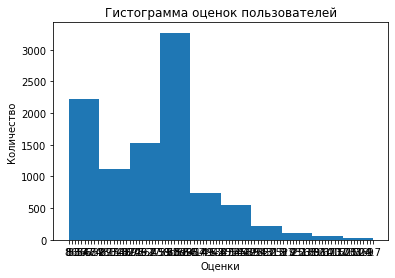

In [15]:
plt.xlabel('Оценки')
plt.ylabel('Количество')
plt.title('Гистограмма оценок пользователей')
data['user_score'].hist(bins=10, grid=False);

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

<AxesSubplot:title={'center':'Гистограмма оценок пользователей'}, xlabel='Оценки', ylabel='Количество'>

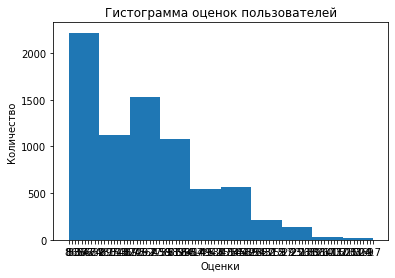

In [17]:
plt.xlabel('Оценки')
plt.ylabel('Количество')
plt.title('Гистограмма оценок пользователей')
data['user_score'].hist(bins=10, grid=False)

<AxesSubplot:title={'center':'Гистограмма оценок критиков'}, xlabel='Оценки', ylabel='Количество'>

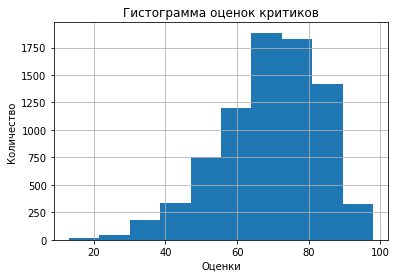

In [18]:
plt.xlabel('Оценки')
plt.ylabel('Количество')
plt.title('Гистограмма оценок критиков')
data['critic_score'].hist(bins=10)

Метод k-ближайших соседей помог заменить пустующие значения в "user_score" и "critic_score". Несколько значений остались пропусками -  удалим их.

Значения в "rating" придётся оставить, так как это категориальная переменная, замену для которой очень сложно найти.

In [26]:
data['rating'] = data['rating'].fillna(value='unknown')

In [27]:
data = data[data['user_score'].isnull() != True]
data = data[data['critic_score'].isnull() != True]

In [28]:
data.duplicated().sum()

0

дубликатов нет

In [29]:
data['critic_score'] = data['critic_score'].astype('float')
data['user_score'] = data['user_score'].astype('float')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16705
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6894 non-null   object 
 1   platform         6894 non-null   object 
 2   year_of_release  6894 non-null   int64  
 3   genre            6894 non-null   object 
 4   na_sales         6894 non-null   float64
 5   eu_sales         6894 non-null   float64
 6   jp_sales         6894 non-null   float64
 7   other_sales      6894 non-null   float64
 8   critic_score     6894 non-null   float64
 9   user_score       6894 non-null   float64
 10  rating           6894 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 646.3+ KB


Нужно создать столбец с суммарными продажами во всех регионах

In [31]:
def sum_sales(row):
    itog = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return itog

data['total_sales'] = data.apply(sum_sales, axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Микровывод: Обработаны пропуски в датасете(пропуски оставлены только в столбце "rating"), в двух стобцах поменяны типы данных на более удобные, а также добавлен новый столбец "total_sales" с общими продажами во всех регионах.

## 

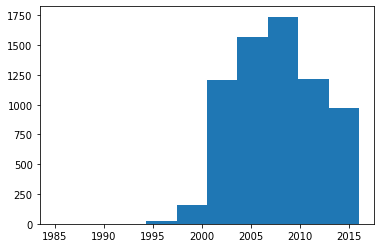

In [32]:
plt.hist(data['year_of_release']);

Начиная с 2000 года виден резкий скачок в количестве игр

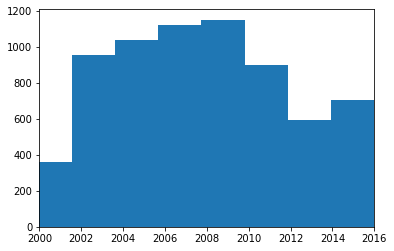

In [33]:
plt.xlim((2000, 2016))
plt.hist(data['year_of_release'], bins=15);

Просадка после 2010 может объясняться влиянием мирового кризиса или тем, что данные не успели обработать.

Для нашего исследования не особо важны даты с 1980 по 2000, так как игр в те годы выпускалось мало и платформы для них совершенно устарели.

In [34]:
platform_grouped = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_grouped

platform
PS2     946.01
X360    853.67
PS3     785.44
Wii     659.23
DS      382.88
PS4     244.27
XB      212.22
PS      209.98
PC      189.85
PSP     187.68
GC      159.25
GBA     131.70
XOne    130.21
3DS     123.52
WiiU     66.08
PSV      30.83
DC        4.55
Name: total_sales, dtype: float64

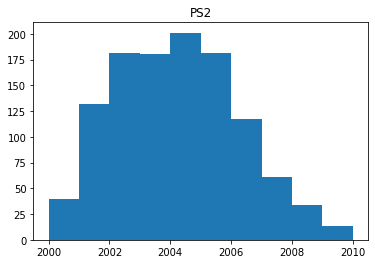

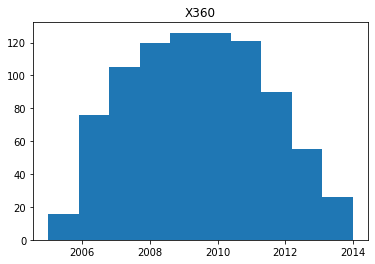

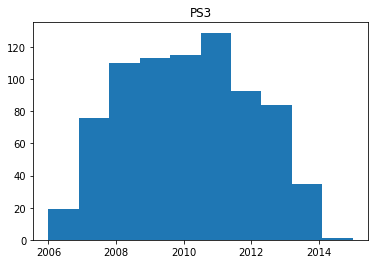

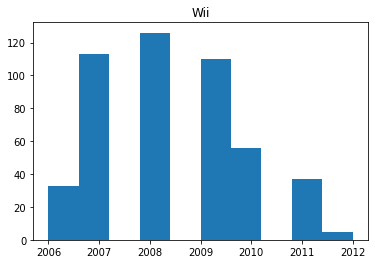

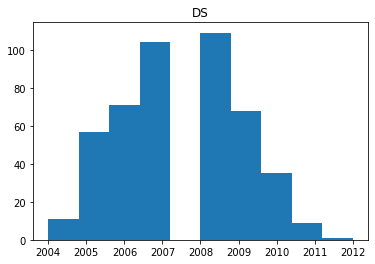

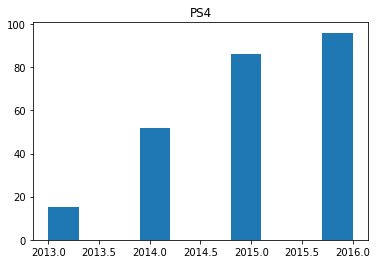

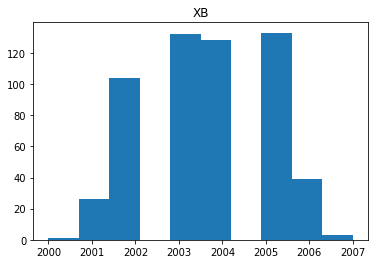

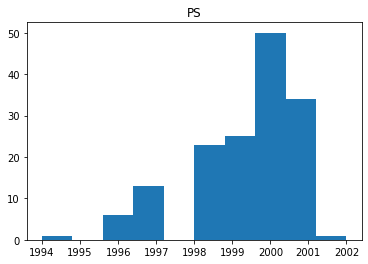

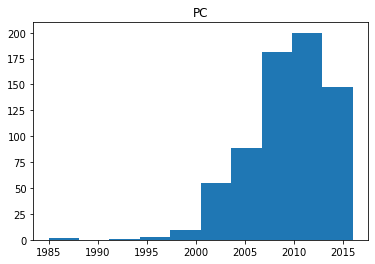

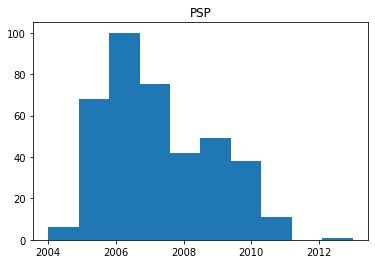

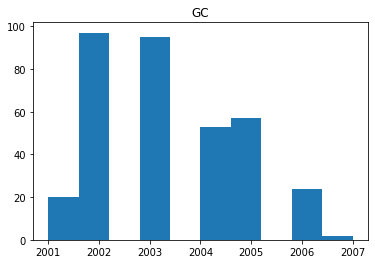

In [35]:
for i in range(11):
    platform_year = data[data['platform'] == platform_grouped.index[i]]
    plt.title(str(platform_grouped.index[i]))
    plt.hist(platform_year['year_of_release'])
    plt.show()
    


С помощью этих гистограмм можно понять какие платформы пользуются популярностью, а какие можно отбросить из иследования, так как они больше не актуальны.
Около 10 лет продолжается жизнь практически каждой платформы!

Про продажам лидируют такие платформы как: PS2, X360, PS3, Wii. Но PS2 и Wii уже неактульны, а X360 к 2015 году практически закончил срок своего существования.

PS4 и PC(personal computer) выглядят как самые перспективные из крупных платформ.

In [36]:
data = data.loc[data['year_of_release'] > 2011] 
# Возьмём такой актуальный период, так как абсолютное большинство платформ, которые выпускали игры до 2005 года, уже устарели, 
# а нам нужна информация только для современных платформ, на которые продолжают выходить игры(а мы выяснили что платфомы живут около 10 лет)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1297 non-null   object 
 1   platform         1297 non-null   object 
 2   year_of_release  1297 non-null   int64  
 3   genre            1297 non-null   object 
 4   na_sales         1297 non-null   float64
 5   eu_sales         1297 non-null   float64
 6   jp_sales         1297 non-null   float64
 7   other_sales      1297 non-null   float64
 8   critic_score     1297 non-null   float64
 9   user_score       1297 non-null   float64
 10  rating           1297 non-null   object 
 11  total_sales      1297 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 131.7+ KB


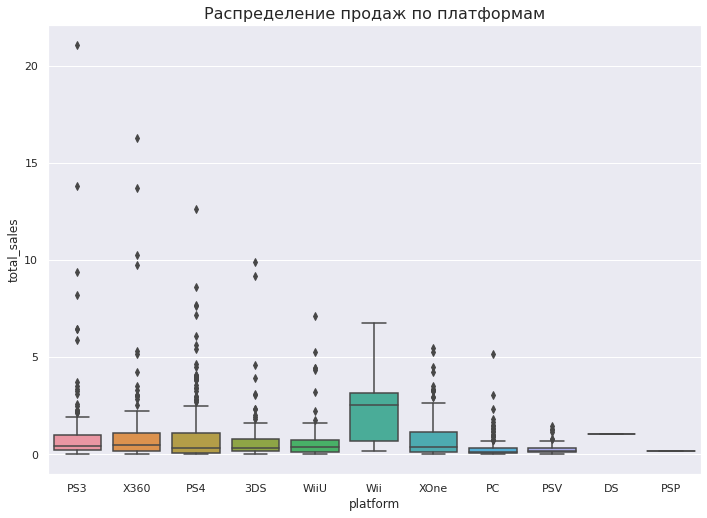

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(x=data["platform"], y=data['total_sales'])
boxplot.axes.set_title("Распределение продаж по платформам", fontsize=16);

Уберём аномальные значения

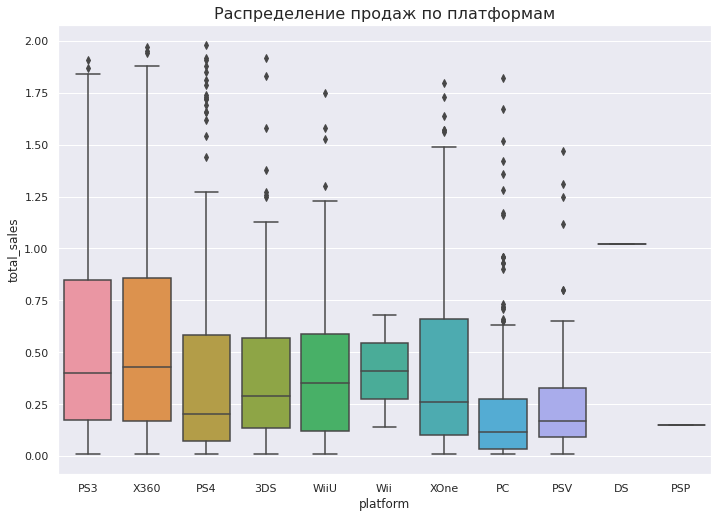

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(x=data["platform"], y=data[data['total_sales'] < 2]['total_sales']);
boxplot.axes.set_title("Распределение продаж по платформам", fontsize=16);

Самые высокие медианы и 3 квартили у  PS3, X360, XOne, WiiU, Wii. Остальные платформы имеют очень маленьку медиану.

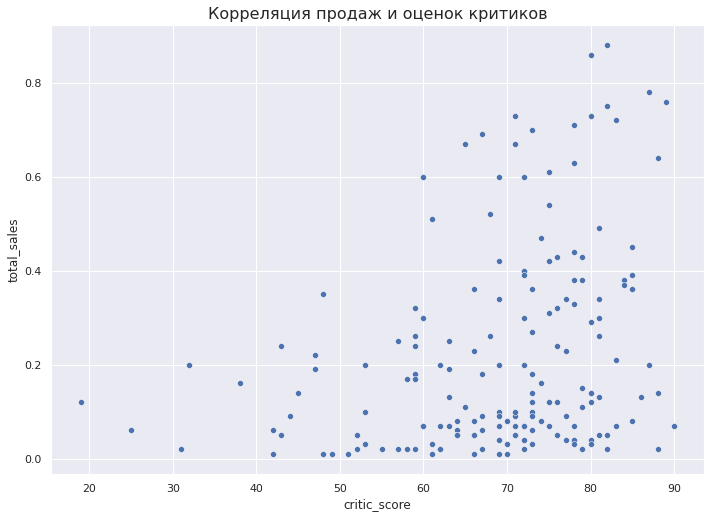

In [39]:
PS4 = data.loc[(data['platform'] == 'PS4') & (data['total_sales'] < 0.9)]
scatterplot = sns.scatterplot(data = PS4, x='critic_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок критиков", fontsize=16);

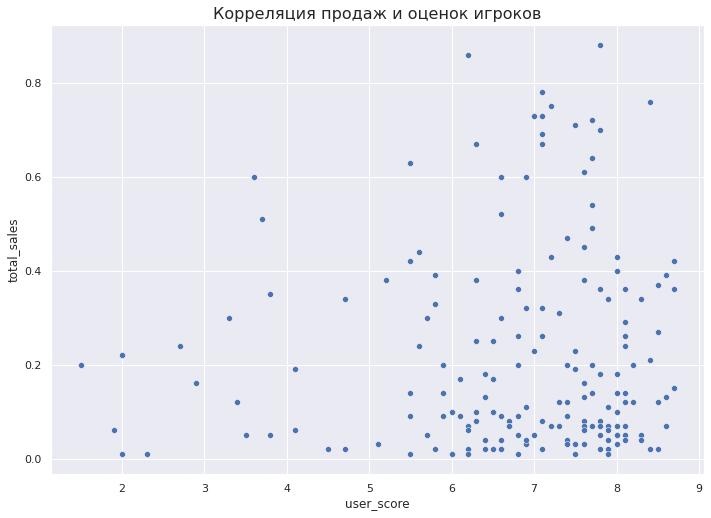

In [40]:
scatterplot = sns.scatterplot(data = PS4, x='user_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок игроков", fontsize=16);

In [41]:
print(PS4['total_sales'].corr(PS4['critic_score']))
print(PS4['total_sales'].corr(PS4['user_score']))

0.3041916758150449
0.05788802761277156


Корреляция более заметна с оценками критиков, чем более высокие оценки, тем больше заработала игра. А вот в оценках игроков точки разбросаны достаточно хаотично. Проверим на других платформах. 

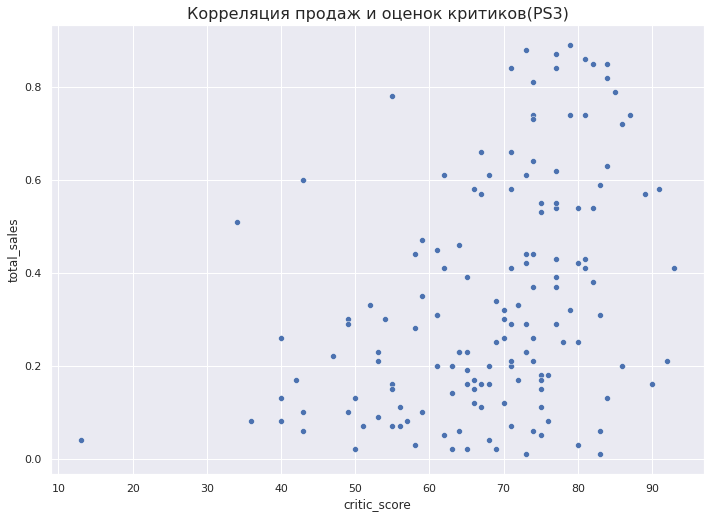

In [42]:
PS3 = data.loc[(data['platform'] == 'PS3') & (data['total_sales'] < 0.9)]
scatterplot = sns.scatterplot(data = PS3, x='critic_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок критиков(PS3)", fontsize=16);

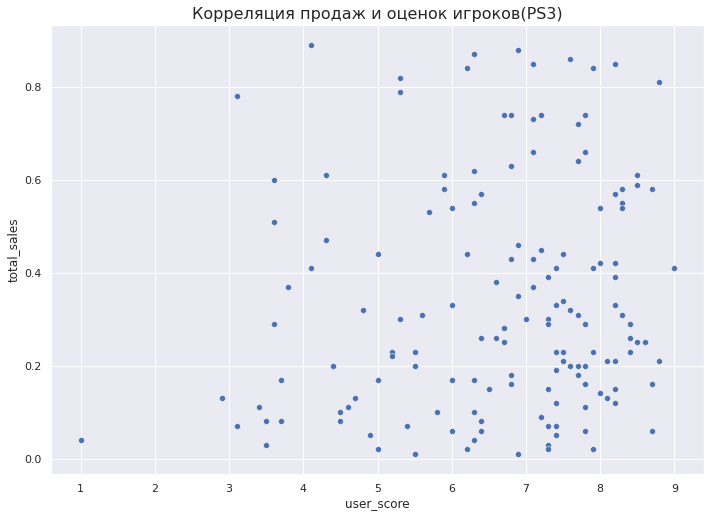

In [43]:
scatterplot = sns.scatterplot(data = PS3, x='user_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок игроков(PS3)", fontsize=16);

In [44]:
print(PS3['total_sales'].corr(PS3['critic_score']))
print(PS3['total_sales'].corr(PS3['user_score']))

0.385424762012627
0.11569355293171543


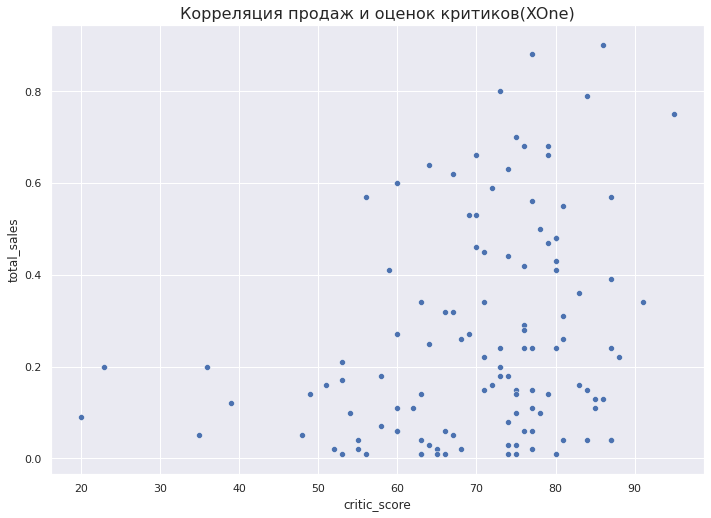

In [45]:
XOne = data.loc[(data['platform'] == 'XOne') & (data['total_sales'] < 0.9)]
scatterplot = sns.scatterplot(data = XOne, x='critic_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок критиков(XOne)", fontsize=16);

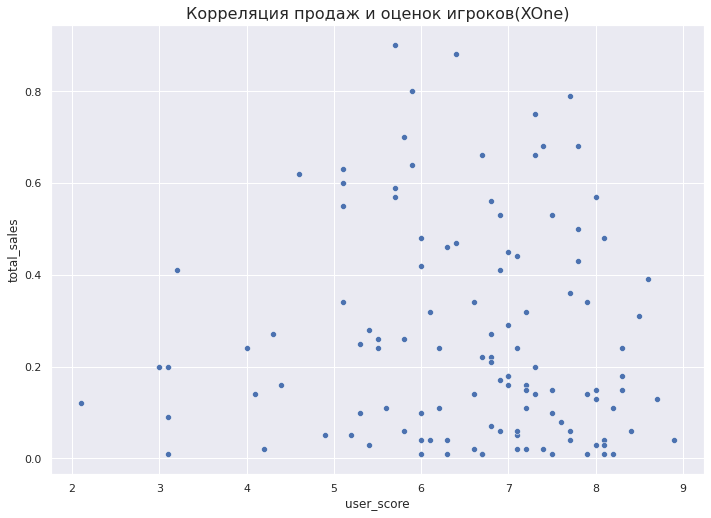

In [46]:
scatterplot = sns.scatterplot(data = XOne, x='user_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок игроков(XOne)", fontsize=16);

In [47]:
print(XOne['total_sales'].corr(XOne['critic_score']))
print(XOne['total_sales'].corr(XOne['user_score']))

0.29309220691199306
-0.050043543174134376


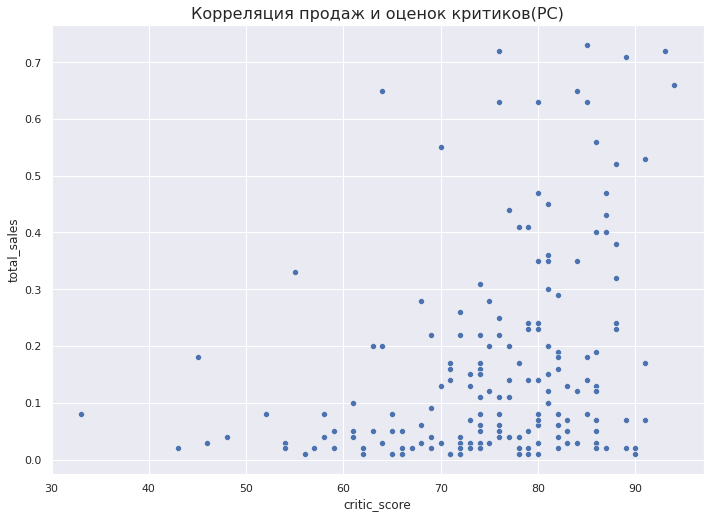

In [48]:
PC = data.loc[(data['platform'] == 'PC') & (data['total_sales'] < 0.9)]
scatterplot = sns.scatterplot(data = PC, x='critic_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок критиков(PC)", fontsize=16);

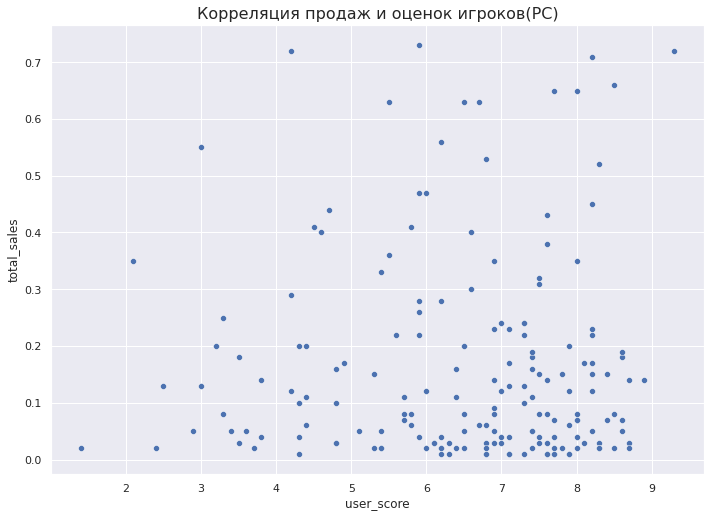

In [49]:
scatterplot = sns.scatterplot(data = PC, x='user_score', y='total_sales')
scatterplot.axes.set_title("Корреляция продаж и оценок игроков(PC)", fontsize=16);

In [50]:
print(PC['total_sales'].corr(PC['critic_score']))
print(PC['total_sales'].corr(PC['user_score']))

0.33558791811430294
-0.005791180125387808


С другими платформами точно такая же тенденция. Оценки критиков показывают будет ли игры прибыльнее лучше чем оценки игроков.

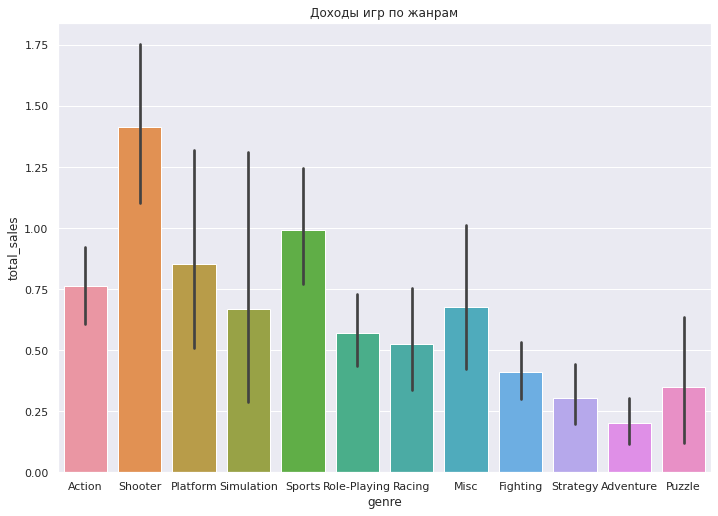

In [51]:
barplot = sns.barplot(data=data, x='genre', y='total_sales');
barplot.axes.set_title('Доходы игр по жанрам');

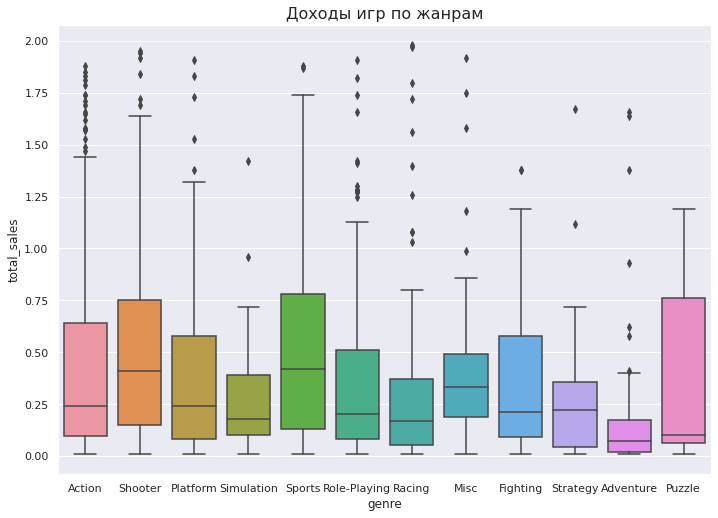

In [52]:
boxplot = sns.boxplot(x=data["genre"], y=data[data['total_sales'] < 2]['total_sales']);
boxplot.axes.set_title("Доходы игр по жанрам", fontsize=16);

Исходя их двух графиков можно сказать, что самые успешные жанры это: шутеры, платформеры и спортивные игры.
Очень плохо продаются приключения, головоломки и стратегии.
Все остальные жанры находятся прмерно на одном уровне.

Микровывод: На данном этапе мы отсекли неактуальные данные(с 1980 по 2005 год), потому что срок жизни платформ составляет в среднем 10 лет.
Самыми прибыльными актуальными платформами являются: PS3, PS4, X360.
Далее выяснили, что между количеством продаж и отзывами критиков корреляция больше чем между количеством продаж и отзывами обычным пользователей. 
В конце этапа были вяывлены самые прибыльные жанры: шутеры, платформеры и спортивные игры.

## 

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1297 non-null   object 
 1   platform         1297 non-null   object 
 2   year_of_release  1297 non-null   int64  
 3   genre            1297 non-null   object 
 4   na_sales         1297 non-null   float64
 5   eu_sales         1297 non-null   float64
 6   jp_sales         1297 non-null   float64
 7   other_sales      1297 non-null   float64
 8   critic_score     1297 non-null   float64
 9   user_score       1297 non-null   float64
 10  rating           1297 non-null   object 
 11  total_sales      1297 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 164.0+ KB


<AxesSubplot:xlabel='platform'>

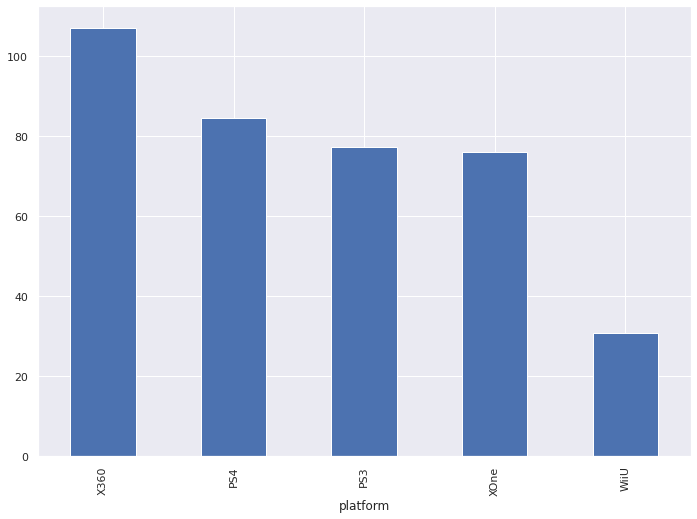

In [54]:
top_5_platform_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_platform_na.plot(kind='bar')

<AxesSubplot:xlabel='platform', ylabel='na_sales'>

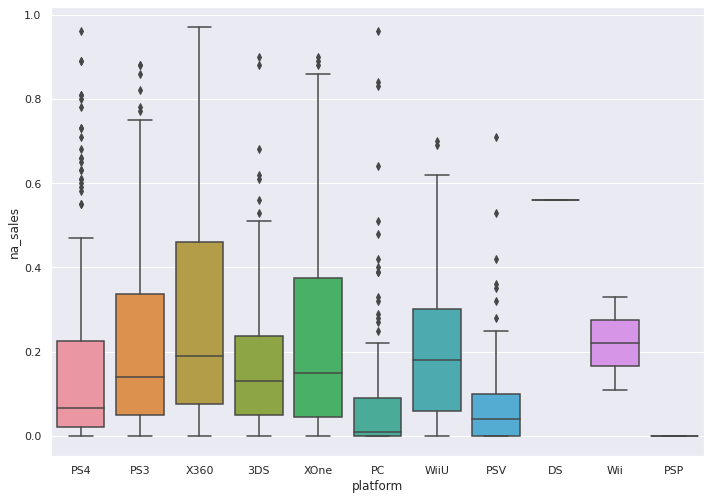

In [55]:
data_without_other = data[['na_sales', 'platform', 'eu_sales', 'jp_sales', 'total_sales']].copy(deep=True)
sns.boxplot(data=data_without_other[data_without_other['na_sales'] < 1], x='platform', y='na_sales')

<AxesSubplot:xlabel='platform'>

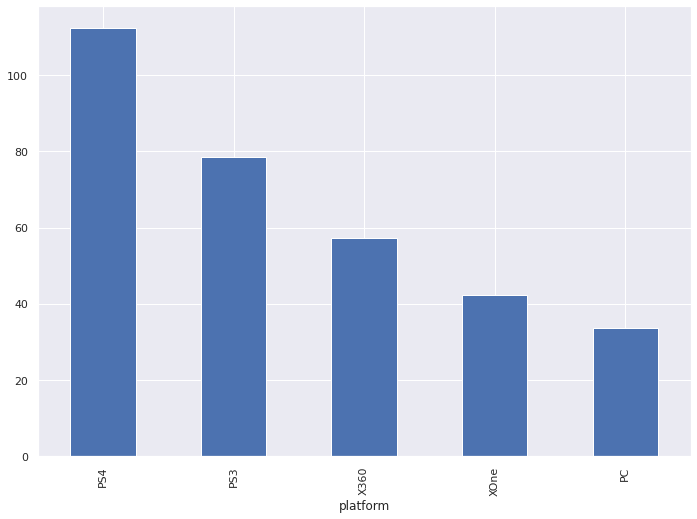

In [56]:
top_5_platform_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_platform_eu.plot(kind='bar')

<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

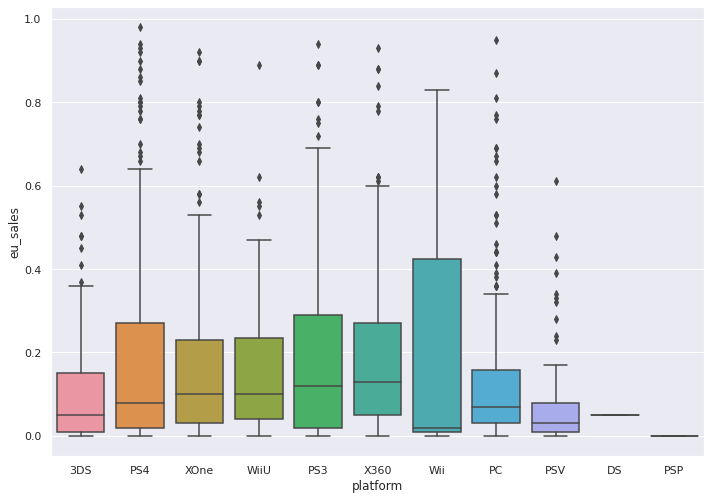

In [57]:
sns.boxplot(data=data_without_other[data_without_other['eu_sales'] < 1], x='platform', y='eu_sales')

<AxesSubplot:xlabel='platform'>

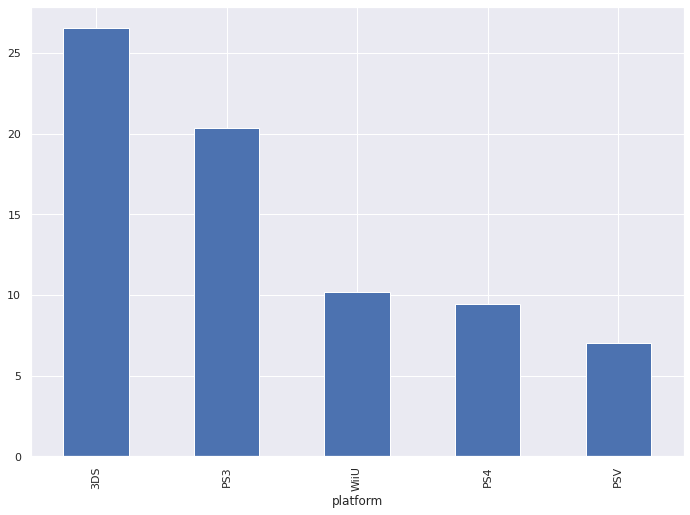

In [58]:
top_5_platform_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_5_platform_jp.plot(kind='bar')

<AxesSubplot:xlabel='platform', ylabel='jp_sales'>

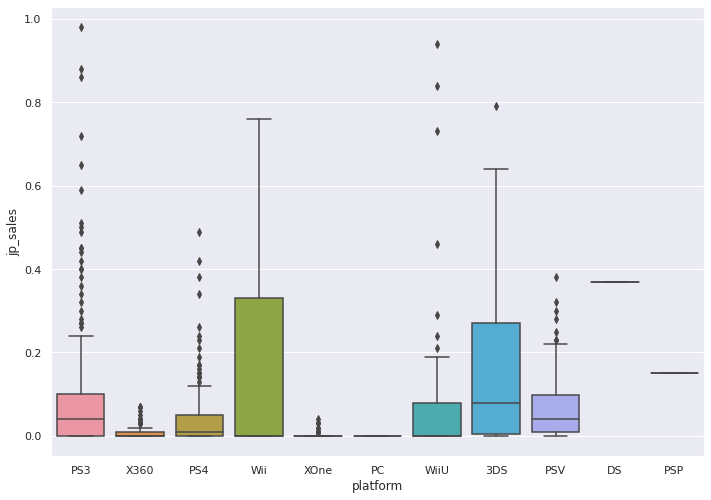

In [59]:
sns.boxplot(data=data_without_other[data_without_other['jp_sales'] < 1], x='platform', y='jp_sales')

Самыми прибыльными в Америке являются(X360, Wii, PS3), в Европе(PS3, X360, Wii) и в Японии(3DS, PS3, WiiU). Популярные платформы схожи в Европе и Америке(там в почёте домашние приставки), а вот в Японии потребители чаще всего берут удобные, компактные приставки(DS, 3DS), которые удобно брать с собой куда либо.

<AxesSubplot:xlabel='genre'>

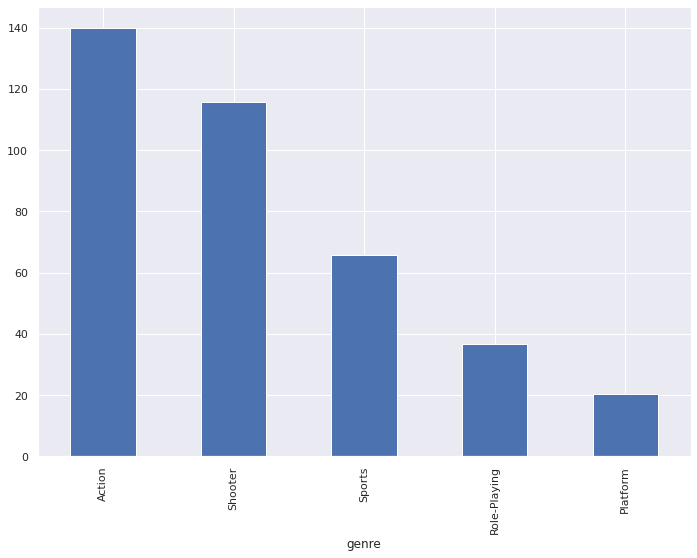

In [60]:
top_5_genre_na = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_genre_na.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

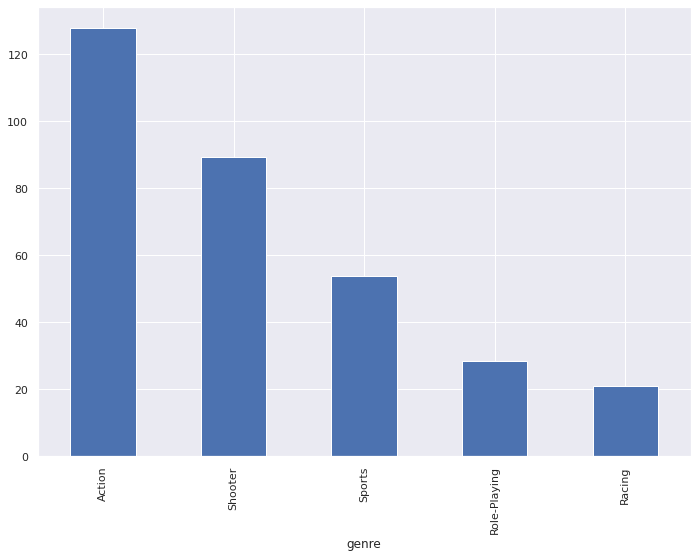

In [61]:
top_5_genre_eu = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_genre_eu.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

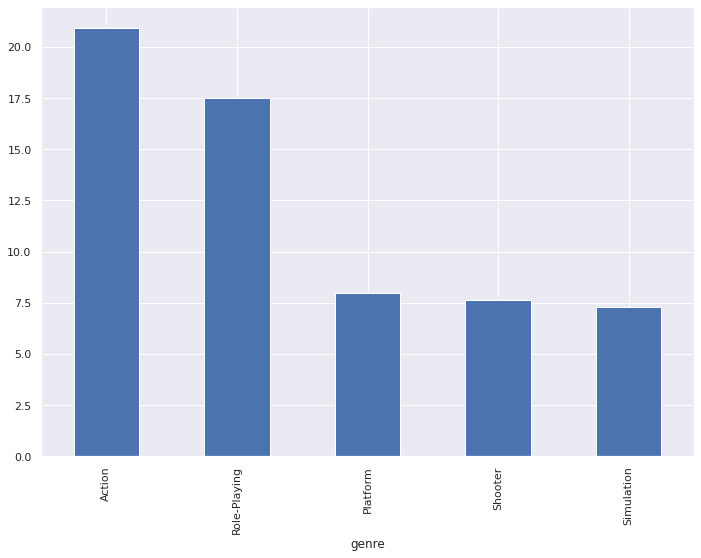

In [62]:
top_5_genre_jp = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_5_genre_jp.plot(kind='bar')

Если в Европе и Америке опять практически одинаковый по наименованиям и по их порядку набор самых популярных жанров(Action, sports, shooter, misc), то Япония отличается от них, хотя в её топе содержатся некоторые жанры, которые популярны и в Европе с Азией. На первых местах в Японии(role-playing, action, misc)

<AxesSubplot:xlabel='rating'>

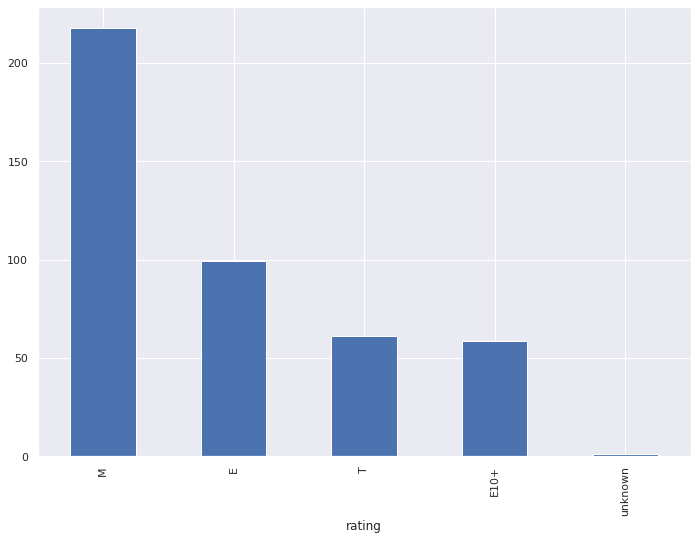

In [63]:
rating_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(kind='bar')

<AxesSubplot:xlabel='rating'>

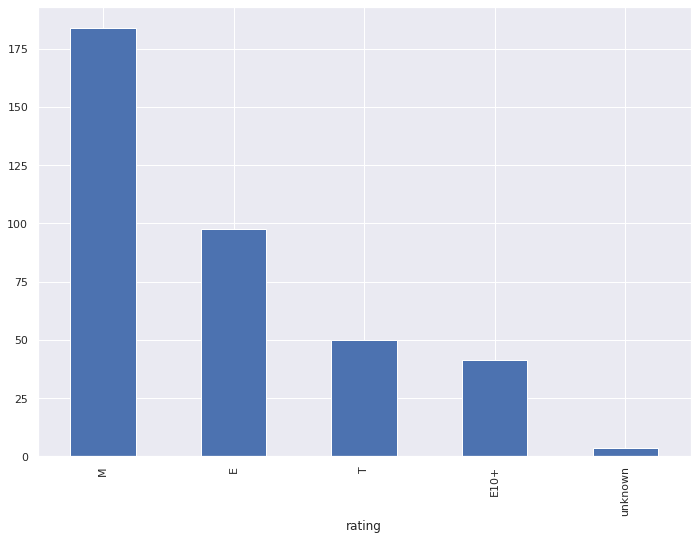

In [64]:
rating_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(kind='bar')

<AxesSubplot:xlabel='rating'>

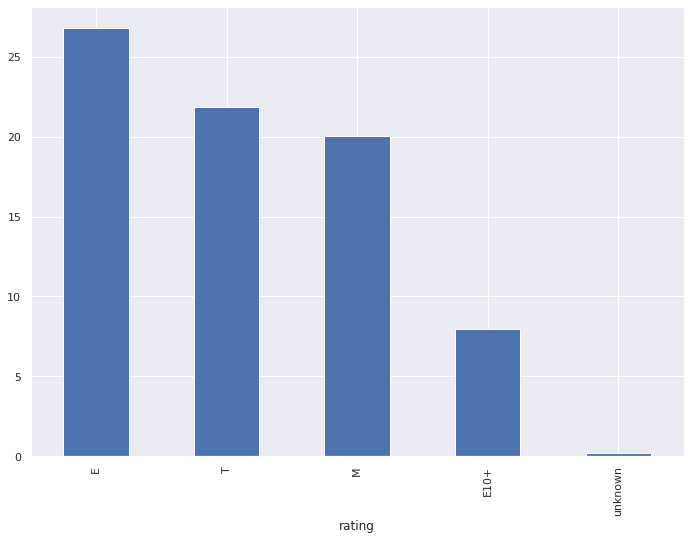

In [65]:
rating_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(kind='bar')

 В Америке и Европе больше всего популярны игры для взрослых(М), а в Японии популярне всего игры для всех(E) и для подростков(T)

Микровывод:

## 

H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1 = Средние пользовательские рейтинги платформ Xbox One и PC разные

In [66]:

xone_user_score = data[data['platform'] == 'XOne']['user_score']
pc_user_score = data[data['platform'] == 'PC']['user_score']
#scipy.stats.ttest_ind (array1, array2, equal_var)

In [67]:
array_xone = random.sample(list(xone_user_score), 100) #создаём рандомные выборки
array_pc = random.sample(list(pc_user_score), 100) 

In [68]:
alpha = 0.05 # достаточно общепринятое значение для уровня критической значимости 

In [69]:
results = st.ttest_ind(array_xone, array_pc)
results

Ttest_indResult(statistic=-0.24726374692158537, pvalue=0.8049603157658778)

In [70]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 = Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
H1 = Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [71]:
action_user_score = data[data['genre'] == 'Action']['user_score']
sport_user_score = data[data['genre'] == 'Sports']['user_score']

In [72]:
array_action = random.sample(list(action_user_score), 100) #создаём рандомные выборки
array_sport = random.sample(list(sport_user_score), 100)

In [73]:
alpha = 0.05
results = st.ttest_ind(action_user_score, sport_user_score)
results

Ttest_indResult(statistic=8.274556354520588, pvalue=9.13633279873618e-16)

In [74]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [75]:
print('p-value равно', results.pvalue)

p-value равно 9.13633279873618e-16


Следовательно - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пояснение: нулевая гипотеза всегда говорит о равенсте чего-то чему-то, а альтернативная гипотеза бывает двух видов: однстороння или двустороняя, так как нам было не важно больше или меньше среднее одной совокупности другой совокупности, то нужна была двустороняя альтернативная гипотеза.

Критерий выбрал st.ttest_ind так как он подходит для сравнения двух средних независимых выборок.

## 

Вывод: 

После первоначальной обработки данных был выбран актуальный период(с 2005 по 2015 год), так как игры, выпускавшиеся раньше выходили на платформы, которые уже сильно устарели. Были выявлена самые прибыльные платформы(PS2, X360, PS3, Wii) и перспективные(PS4 и PC, XOne). Также было выявлено, что оценки критиков с наибольшей вероятностью помогают понять будет ли успешна игра. 

При сравнении жанров самыми прибыльными оказались: шутеры, платформеры и спортивные игры. Самыми неприбыльными: стратегиии и головолмки.

Дальше было проведено исследования предпотения потребителей в каждом регионе. В Северной америке и Европе практически одинаковые предпочтения в платформах(X360, Wii, PS3) и жанрах (Action, sports, shooter, misc). В Японии же немного другие предпочтения(платформы - DS, 3DS, PS3. Жанры - role-playing, action, misc). 

В конце были проверены 2 гипотезы. Было выяснено что, средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
